In [2]:
library(tidyverse)
library(tidyr)
library(ggplot2)
library(GGally)

set.seed(1984)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [3]:
params <- c("p_1h", "p_10h", "p_100h", "p_herb", "p_1000h", "p_ws", "p_wd", "p_th", "p_hh", "p_adj")
# loads random individuals data set
individualHeader <- c(params, paste("p", seq(11,21), sep=""))
individuals <- read.table('https://raw.githubusercontent.com/edigley/spif/master/results/farsite_individuals.txt', skip=1, col.names=individualHeader)
individuals <- subset(individuals, select=params)
individuals <- tibble::rowid_to_column(individuals, "id")
individuals$id <- (individuals$id - 1)

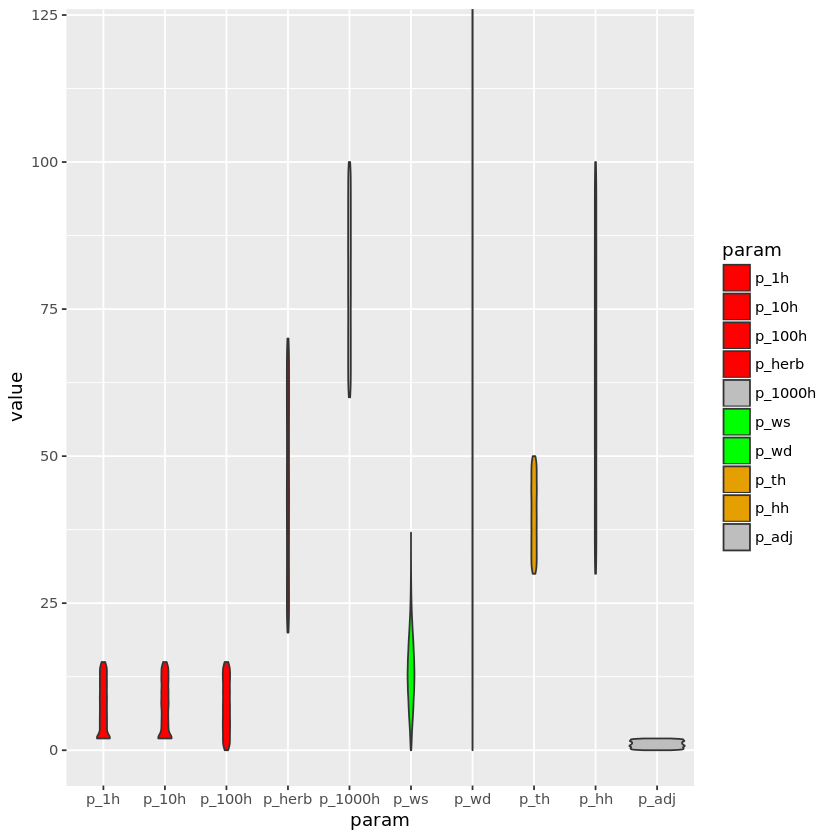

In [4]:
# plots a violin-like plot showing how gene values are distributed
fmsColor <- "red";
windColor <- "green";
weatherColor <- "#e69f00";
individuals.long <- gather(individuals, param, value, params, factor_key=TRUE)
p <- ggplot(individuals.long, aes(x=param, y=value, fill=param)) + geom_violin() # geom_boxplot() + geom_jitter()
p + scale_fill_manual(values=c(fmsColor, fmsColor, fmsColor, fmsColor, "grey", windColor, windColor, weatherColor, weatherColor,"grey")) + coord_cartesian(ylim = c(0, 120))

In [5]:
# loads individuals run results data set
individualsResults <- read.table('https://raw.githubusercontent.com/edigley/spif/master/results/farsite_individuals_runtime_jonquera.txt', header=T)
individualsResults <- subset(individualsResults, select=c("individual", paste("p", 0:9, sep=""), "runtime", "maxRSS"))
colnames(individualsResults) <- c("id", params, "runtime", "maxRSS")

In [6]:
# generates the multiple linear regression model for runtime based on individuals run results
runtimeModel <- lm(runtime ~ p_1h + p_10h + p_100h + p_herb + p_1000h + p_ws + p_wd + p_th + p_hh + p_adj, data=individualsResults)
summary(runtimeModel)$coefficient 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2526.555566,1090.7674956,2.3163099,2.074481e-02
p_1h,-38.153671,22.2287574,-1.7164104,8.639977e-02
p_10h,-61.671759,22.8766268,-2.6958414,7.140183e-03
p_100h,23.680559,21.6613802,1.0932156,2.745651e-01
p_herb,-8.632606,6.2405319,-1.3833125,1.668809e-01
p_1000h,-6.267491,7.9475479,-0.7886069,4.305306e-01
p_ws,116.093266,15.3705237,7.5529805,9.652600e-14
p_wd,-0.164670,0.8782081,-0.1875068,8.513017e-01
p_th,6.863383,15.9715322,0.4297260,6.674885e-01
p_hh,-28.319244,4.5154508,-6.2716316,5.329558e-10


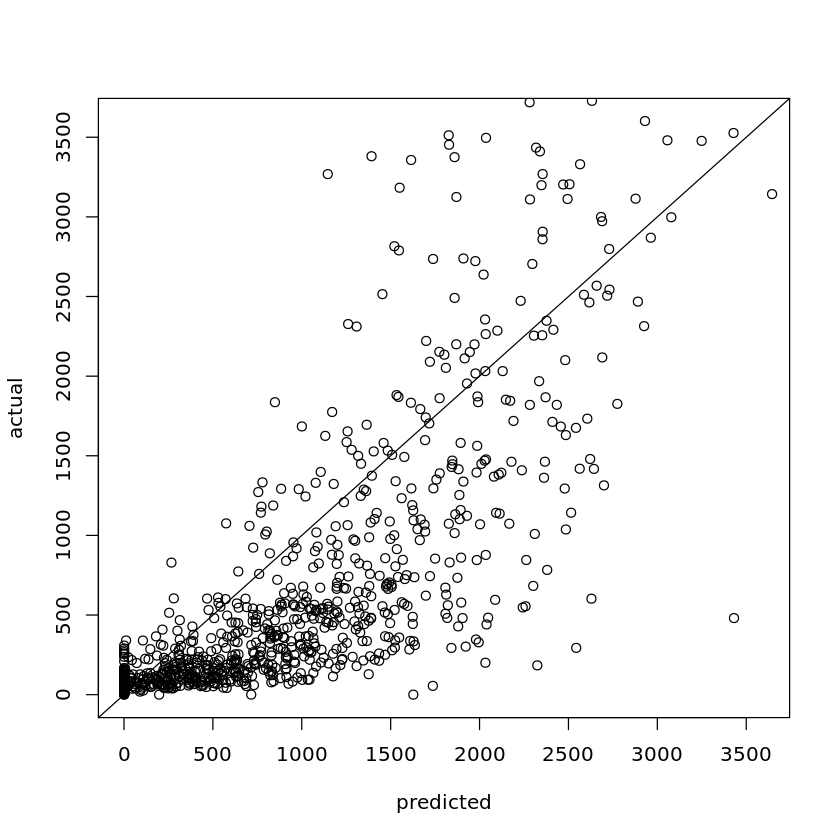

In [7]:
# analyses the quality of the prediction
ds <- individualsResults
ds$prediction <- predict(runtimeModel, head(individuals, 1001))
ds$prediction <- ifelse(ds$prediction<1, 1, ds$prediction)
plot(ds$prediction, ds$runtime, xlab="predicted", ylab="actual", xlim=c(0,3600), ylim=c(0,3600))
abline(a=0, b=1)

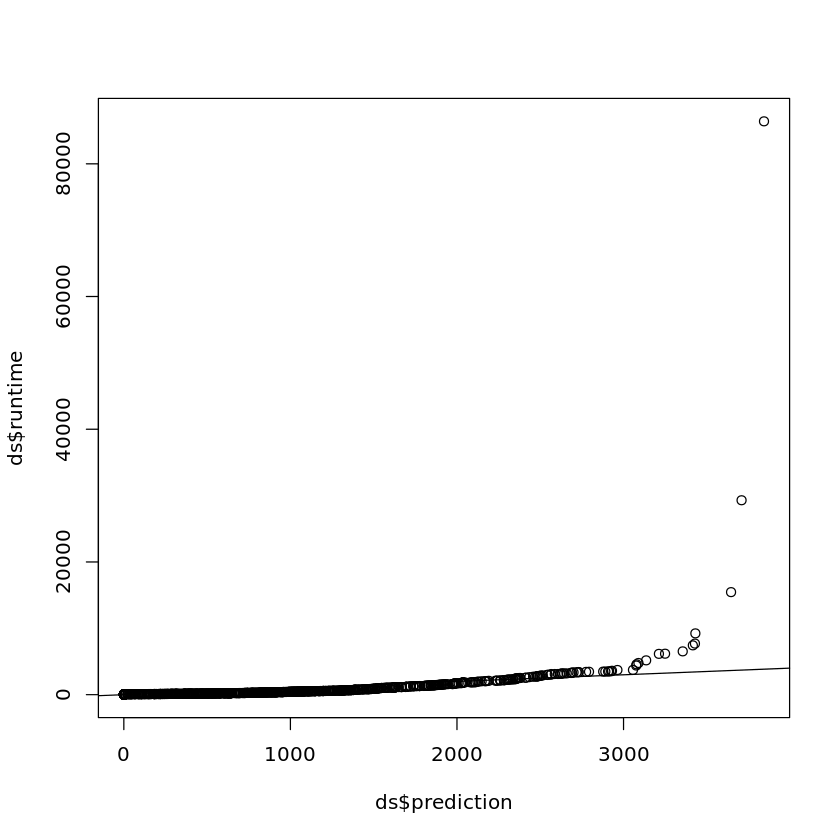

In [8]:
qqplot(ds$prediction, ds$runtime)
abline(a=0, b=1)

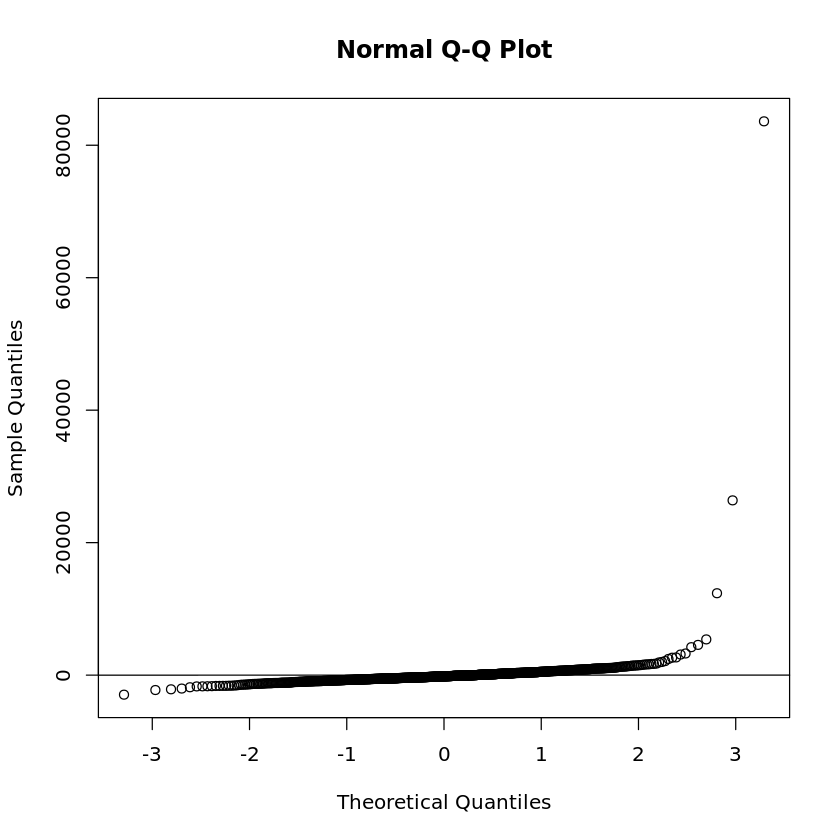

In [9]:
qqnorm(residuals(runtimeModel))
abline(a=0, b=1)

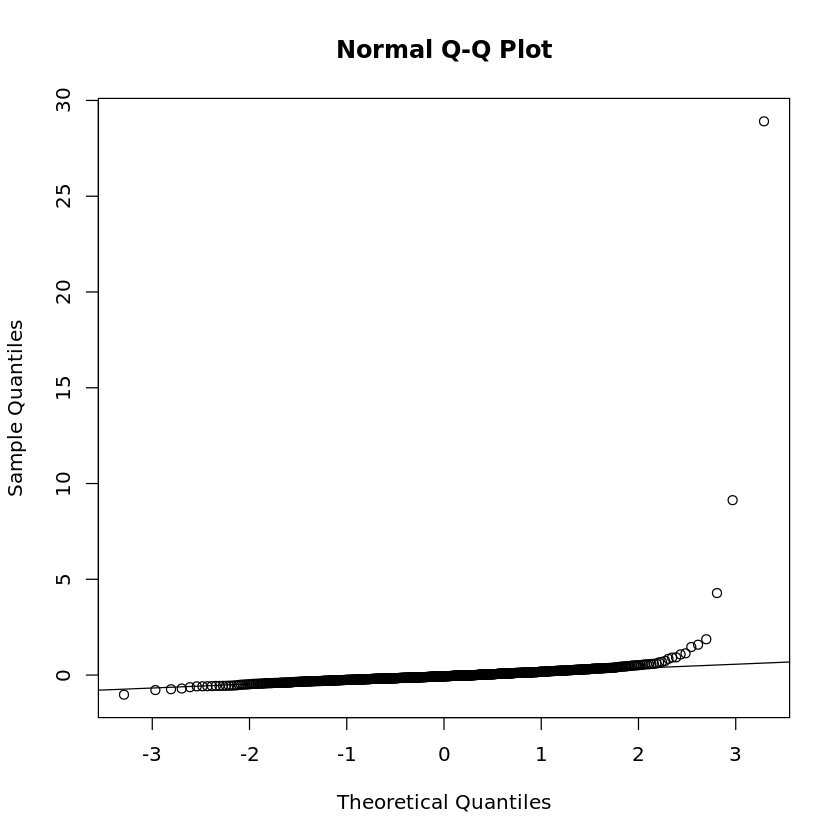

In [10]:
qqnorm(rstandard(runtimeModel))
qqline(rstandard(runtimeModel))

In [11]:
metricsOfInterest <- c("runtime") #, "maxRSS")
columnsOfInterest <- c("id", params, metricsOfInterest)

results12hours <- read.table('https://raw.githubusercontent.com/edigley/spif/master/results/farsite_individuals_runtime_jonquera_12_hours.txt', header=T)
results12hours <- subset(results12hours, select=c("individual", paste("p", 0:9, sep=""), metricsOfInterest))
colnames(results12hours) <- columnsOfInterest

results18hours <- read.table('https://raw.githubusercontent.com/edigley/spif/master/results/farsite_individuals_runtime_jonquera_18_hours.txt', header=T)
results18hours <- subset(results18hours, select=c("individual", paste("p", 0:9, sep=""), metricsOfInterest))
colnames(results18hours) <- columnsOfInterest

results24hours <- read.table('https://raw.githubusercontent.com/edigley/spif/master/results/farsite_individuals_runtime_jonquera_24_hours.txt', header=T)
results24hours <- subset(results24hours, select=c("individual", paste("p", 0:9, sep=""), metricsOfInterest))
colnames(results24hours) <- columnsOfInterest

results30hours <- read.table('https://raw.githubusercontent.com/edigley/spif/master/results/farsite_individuals_runtime_jonquera_30_hours.txt', header=T)
results30hours <- subset(results30hours, select=c("individual", paste("p", 0:9, sep=""), metricsOfInterest))
colnames(results30hours) <- columnsOfInterest

cases <- c(12,18,24,30)
cases <- paste(cases, "hours", sep="")
results12hours$case <- "12hours"
results12hours$hours <- 12
results18hours$case <- "18hours"
results18hours$hours <- 18
results24hours$case <- "24hours"
results24hours$hours <- 24
results30hours$case <- "30hours"
results30hours$hours <- 30

results <- rbind(results12hours, results18hours, results24hours, results30hours)
head(results)

id,p_1h,p_10h,p_100h,p_herb,p_1000h,p_ws,p_wd,p_th,p_hh,p_adj,runtime,case,hours
0,2,3,12,52,91,16,145,33,61,1.718865,7.40,12hours,12
1,15,10,1,66,84,17,155,48,32,0.046063,108.06,12hours,12
2,10,2,14,33,89,20,17,30,53,0.598361,52.62,12hours,12
3,3,13,4,30,80,8,232,49,49,0.416760,10.38,12hours,12
4,6,14,13,48,69,11,70,41,41,1.418043,25.37,12hours,12
5,3,4,4,26,88,4,36,33,45,1.612439,6.35,12hours,12


In [12]:
results.long <- gather(
    subset(results, case %in% cases, select=c("case", "id", "runtime")),
    param, value, runtime, factor_key=TRUE
)
head(results.long)

case,id,param,value
12hours,0,runtime,7.40
12hours,1,runtime,108.06
12hours,2,runtime,52.62
12hours,3,runtime,10.38
12hours,4,runtime,25.37
12hours,5,runtime,6.35


Warning message:
“Removed 72 rows containing non-finite values (stat_bin).”

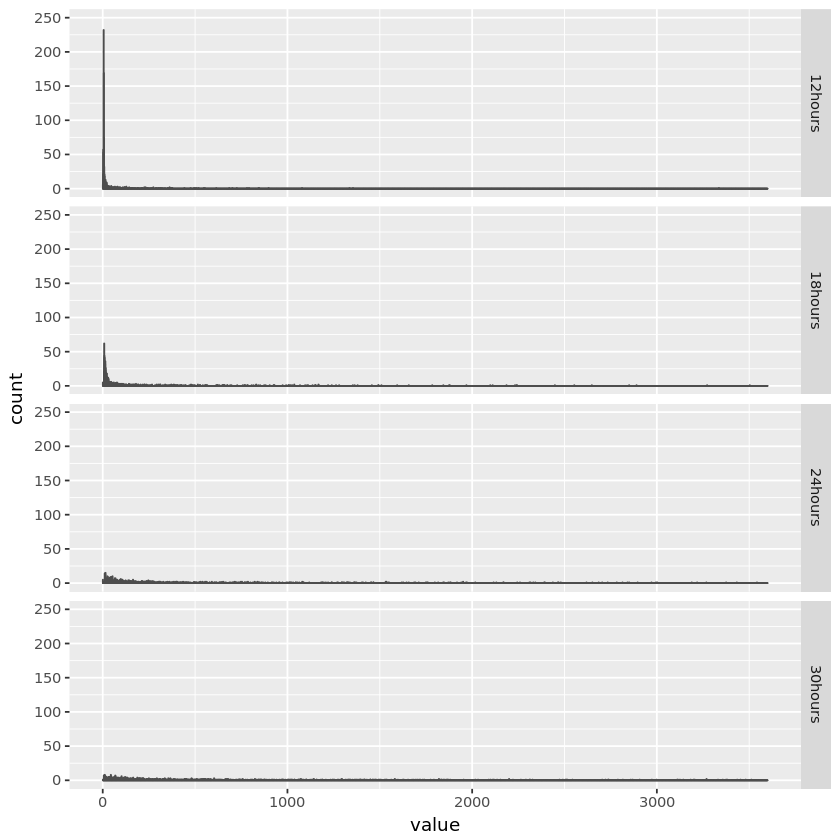

In [13]:
# plots a histogram with three box, one for each case
# binwidth = 1 second
ggplot(results.long, aes(x=value, fill=hours)) + 
    geom_histogram(binwidth=1, color="grey30", fill="white") +
    facet_grid(case ~ .) + 
    xlim(0, 3600) + ## xlim(0, 300) 
    ylim(0, 250) ## ylim(0, .15)

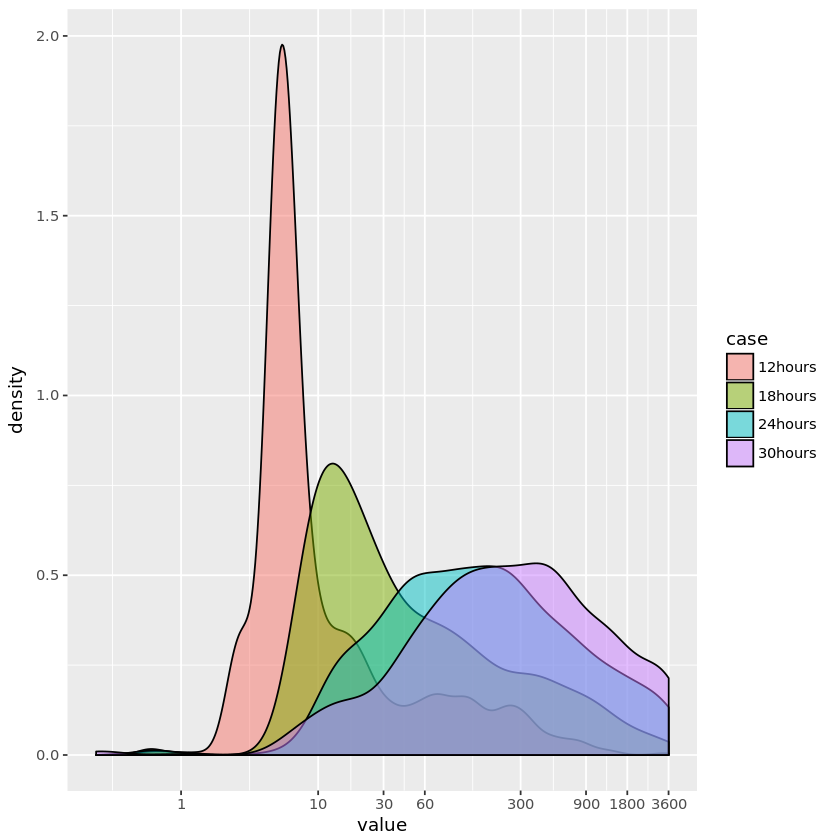

In [14]:
# transform x-axis to log 10
ggplot(results.long, aes(x=value, fill=case)) + 
    geom_density(alpha=0.5) + 
    scale_x_log10(breaks=c(1,10,30,60,300,900,1800,3600))

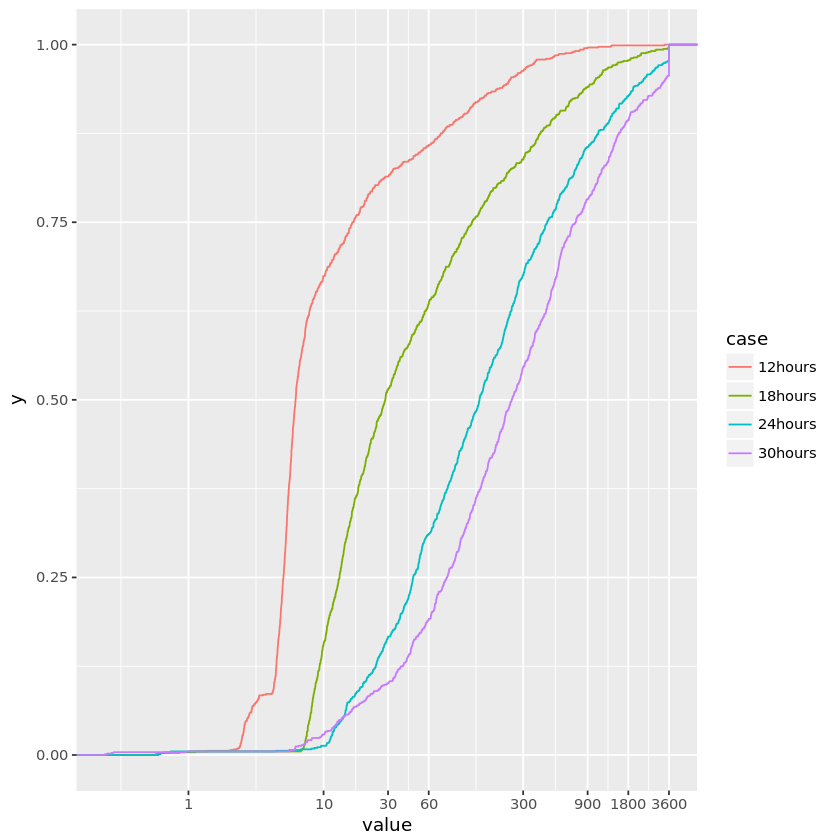

In [15]:
ggplot(results.long, aes(value, colour = case)) + 
    stat_ecdf() + 
    scale_x_log10(breaks=c(1,10,30,60,300,900,1800,3600))

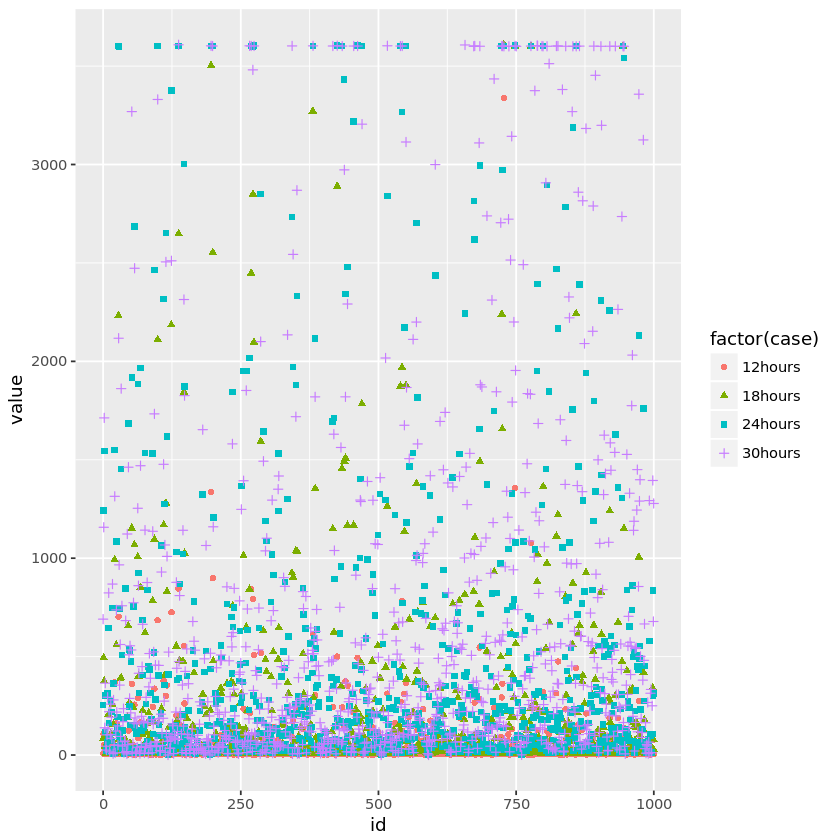

In [16]:
# plots the runtime for all individuals, with different shapes and colors for each case (solid colors)
p <- ggplot(results.long, aes(x = id, y = value)) 
p + geom_point(position = position_jitter(0.2)) +
aes(colour = factor(case)) +
aes( shape = factor(case)) 

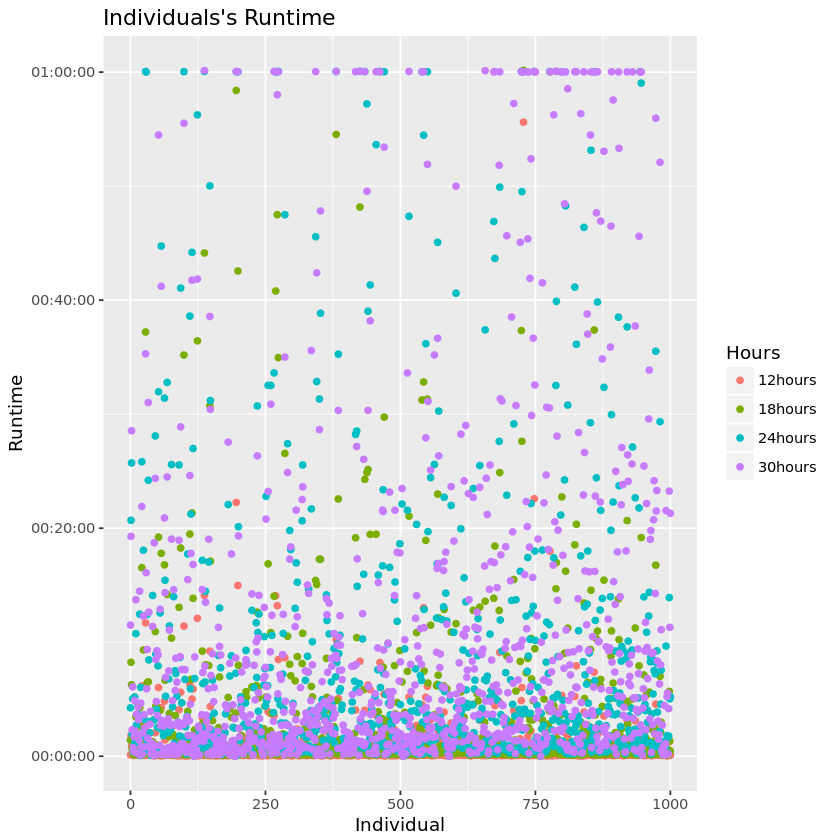

In [17]:
# scatter plot the runtime for all individuals, with same shape and different colors for each case (with light solid colors)
p + geom_point(aes(color = case)) + 
scale_size_manual(values = c(2.5,2,1.5)) + 
scale_y_time() +
ylab("Runtime") + 
xlab("Individual") + 
labs(colour = "Hours") + 
labs(title = "Individuals's Runtime", subtitle = NULL)

p_1h,p_10h,p_100h,p_herb,p_1000h,p_ws,p_wd,p_th,p_hh,p_adj,hours,runtime
2,3,12,52,91,16,145,33,61,1.718865,12,7.40
15,10,1,66,84,17,155,48,32,0.046063,12,108.06
10,2,14,33,89,20,17,30,53,0.598361,12,52.62
3,13,4,30,80,8,232,49,49,0.416760,12,10.38
6,14,13,48,69,11,70,41,41,1.418043,12,25.37
3,4,4,26,88,4,36,33,45,1.612439,12,6.35


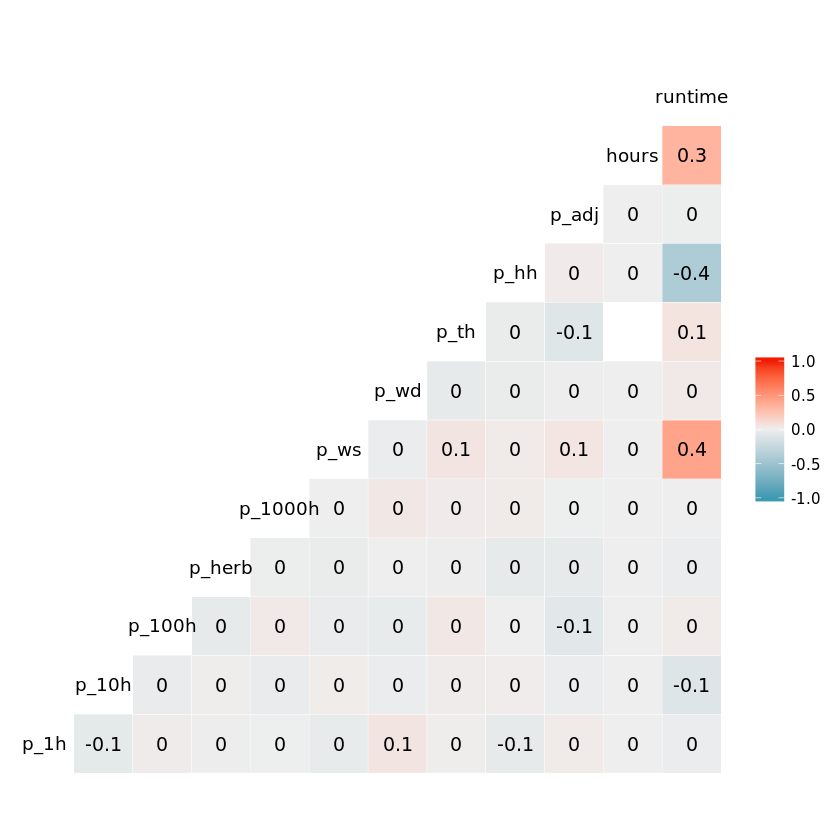

In [18]:
# Correlation matrix
mydata <- mtcars[, c(1,3,4,5,6,7)]
results2 <- subset(results, select=c(params, "hours", "runtime"))
head(results2)
ggcorr(results2, palette = "Set3", label = TRUE)

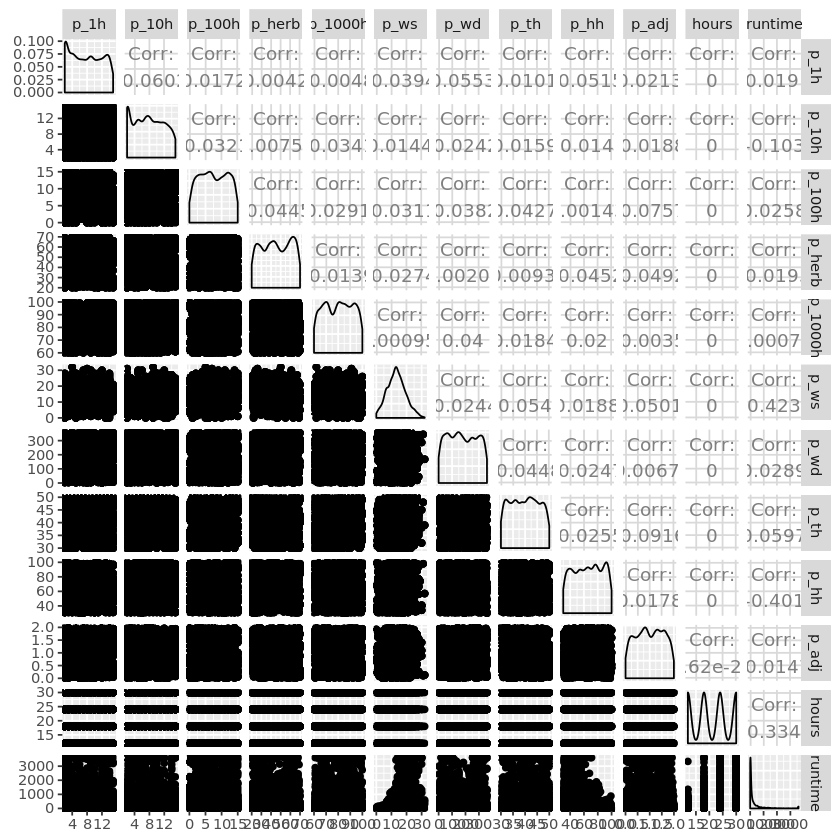

In [19]:
# An overview with all correlation coeficients
ggpairs(results2)

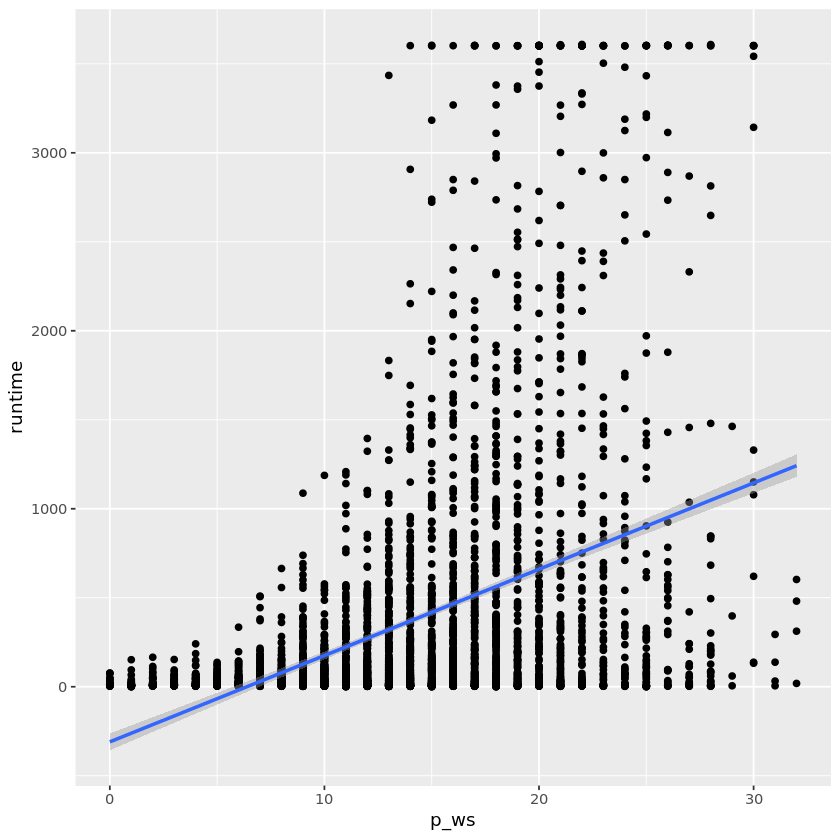

In [20]:
ggplot(results, aes(x=p_ws, y=runtime)) + 
    geom_point() + 
    geom_smooth(method = "lm")

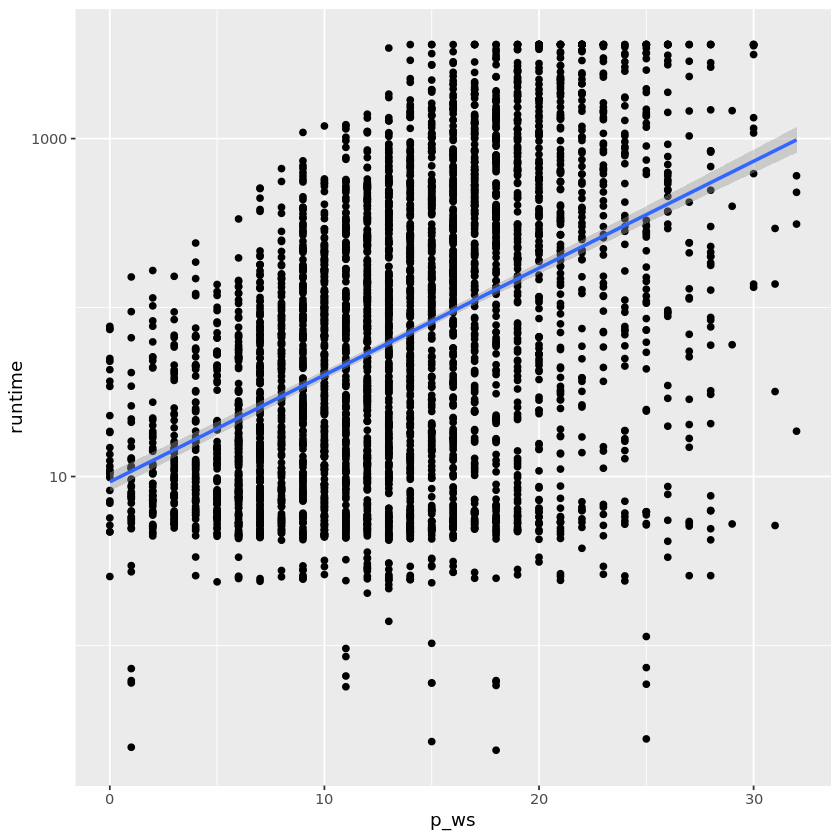

In [21]:
ggplot(results, aes(x=p_ws, y=runtime)) + 
    geom_point() + 
    geom_smooth(method = "lm") + 
    scale_y_log10()

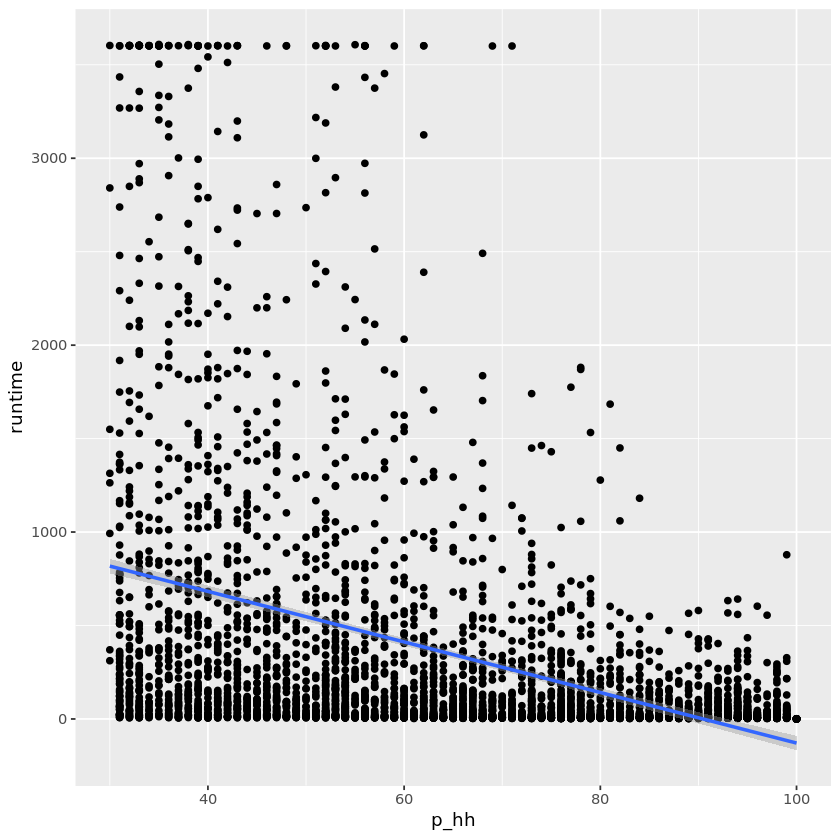

In [22]:
ggplot(results, aes(x=p_hh, y=runtime)) + 
    geom_point() + 
    geom_smooth(method = "lm")

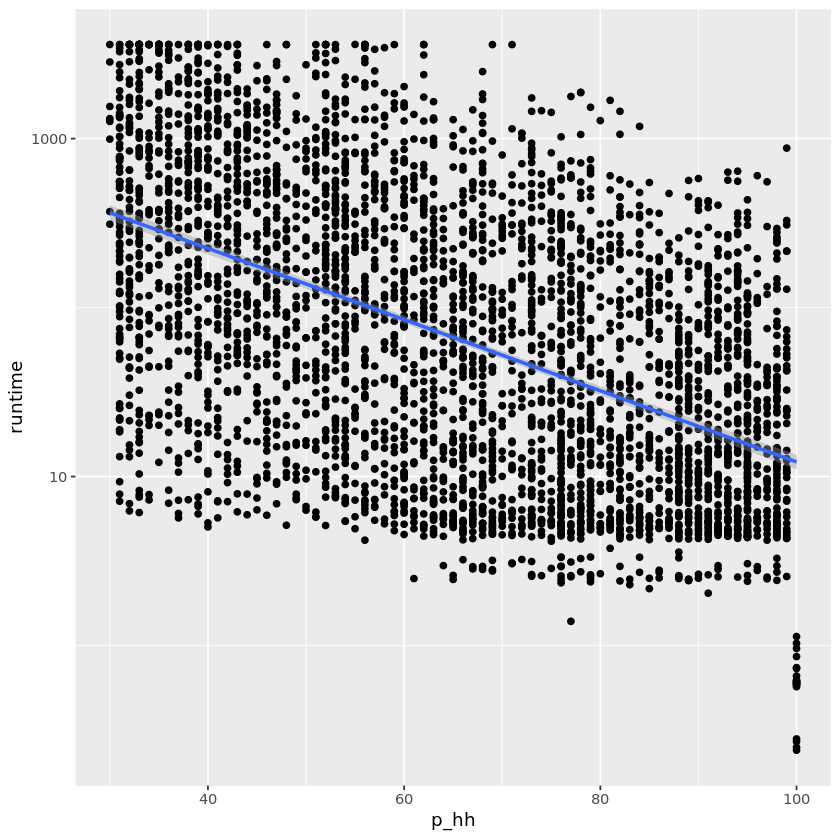

In [23]:
ggplot(results, aes(x=p_hh, y=runtime)) + 
    geom_point() + 
    geom_smooth(method = "lm") + 
    scale_y_log10()

In [24]:
cor(subset(results, select=c(params,"runtime")), method="pearson") 

,p_1h,p_10h,p_100h,p_herb,p_1000h,p_ws,p_wd,p_th,p_hh,p_adj,runtime
p_1h,1.00000000,-0.060241090,0.017207678,0.004198860,-0.0047989900,-0.0393683054,0.055307506,0.010110874,-0.051488453,0.021253370,-0.0190974775
p_10h,-0.06024109,1.000000000,-0.032110196,0.007567948,-0.0340650901,0.0144089878,-0.024203193,0.015927779,0.013998597,-0.018835560,-0.1033902649
p_100h,0.01720768,-0.032110196,1.000000000,-0.044479727,0.0290792353,-0.0310556222,-0.038180916,0.042665015,0.001430531,-0.075662351,0.0257781390
p_herb,0.00419886,0.007567948,-0.044479727,1.000000000,-0.0139089102,-0.0274197700,0.002015352,-0.009376368,-0.045166719,-0.049212305,-0.0194683101
p_1000h,-0.00479899,-0.034065090,0.029079235,-0.013908910,1.0000000000,-0.0009565038,0.040039285,0.018440689,0.019989041,-0.003495546,0.0007395826
p_ws,-0.03936831,0.014408988,-0.031055622,-0.027419770,-0.0009565038,1.0000000000,-0.024402198,0.054029352,0.018829863,0.050078136,0.4228713784
p_wd,0.05530751,-0.024203193,-0.038180916,0.002015352,0.0400392851,-0.0244021980,1.000000000,-0.044836747,-0.024687255,-0.006764029,0.0289376448
p_th,0.01011087,0.015927779,0.042665015,-0.009376368,0.0184406893,0.0540293523,-0.044836747,1.000000000,-0.025480490,-0.091550528,0.0597134136
p_hh,-0.05148845,0.013998597,0.001430531,-0.045166719,0.0199890405,0.0188298630,-0.024687255,-0.025480490,1.000000000,0.017826266,-0.4008251769
p_adj,0.02125337,-0.018835560,-0.075662351,-0.049212305,-0.0034955465,0.0500781360,-0.006764029,-0.091550528,0.017826266,1.000000000,-0.0147236478


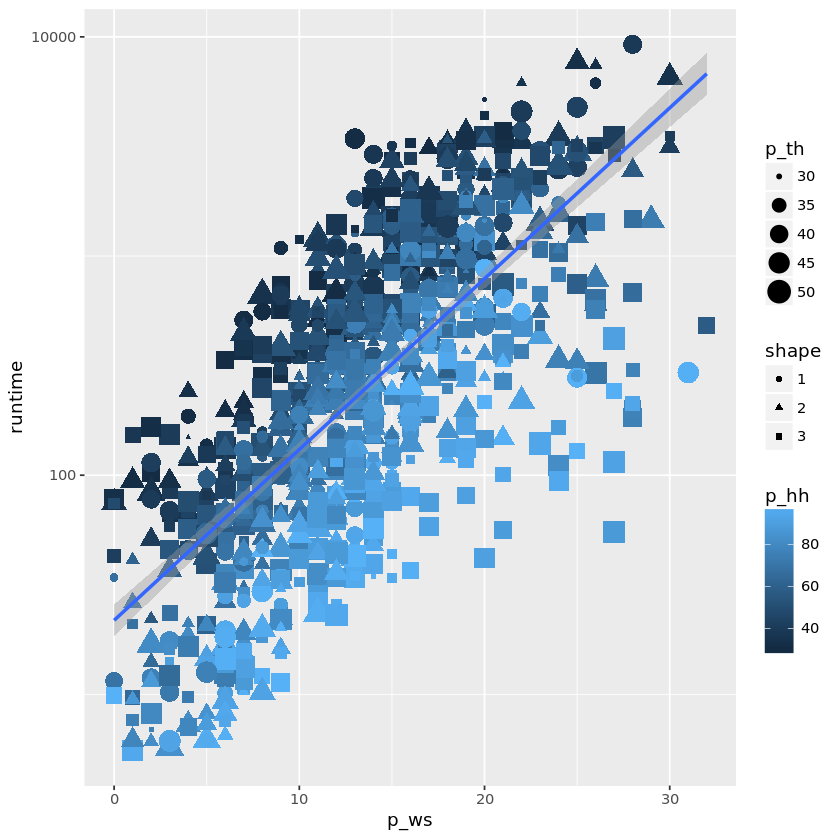

In [25]:
results <- individualsResults
filteredResults <- subset(results, runtime > 5 & runtime < 13600)
customShape <- function(v){round(v/6)}
filteredResults$shape <- as.factor(customShape(filteredResults$p_10h)+1)
ggplot(filteredResults) +
    aes(x=p_ws, y=runtime, color=p_hh) + 
    geom_point(aes(shape=shape, size=p_th)) +
    geom_smooth(method = "lm") + 
    scale_y_log10()

In [26]:
results0a30hours <- results30hours
results0a30hours$case <- "0a30hours"
results0a30hours$hours <- 30
results0a30hours$runtime <- results30hours$runtime

results12a30hours <- results30hours
results12a30hours$case <- "12a30hours"
results12a30hours$hours <- 18
results12a30hours$runtime <- results30hours$runtime - results12hours$runtime

results18a30hours <- results30hours
results18a30hours$case <- "18a30hours"
results18a30hours$hours <- 12
results18a30hours$runtime <- results30hours$runtime - results18hours$runtime

results24a30hours <- results30hours
results24a30hours$case <- "24a30hours"
results24a30hours$hours <- 6
results24a30hours$runtime <- results30hours$runtime - results24hours$runtime

In [27]:
resultsDeltas <- rbind(results0a30hours, results12a30hours, results18a30hours, results24a30hours)
cases = c("0a30hours","12a30hours","18a30hours","24a30hours");
resultsDeltas.long <- gather(
    subset(resultsDeltas, case %in% cases, select=c("case", "id", "runtime")),
    param, value, runtime, factor_key=TRUE)
head(resultsDeltas.long)

case,id,param,value
0a30hours,0,runtime,690.34
0a30hours,1,runtime,1157.20
0a30hours,2,runtime,1712.82
0a30hours,3,runtime,138.85
0a30hours,4,runtime,365.20
0a30hours,5,runtime,44.73


Warning message:
“Removed 268 rows containing non-finite values (stat_bin).”

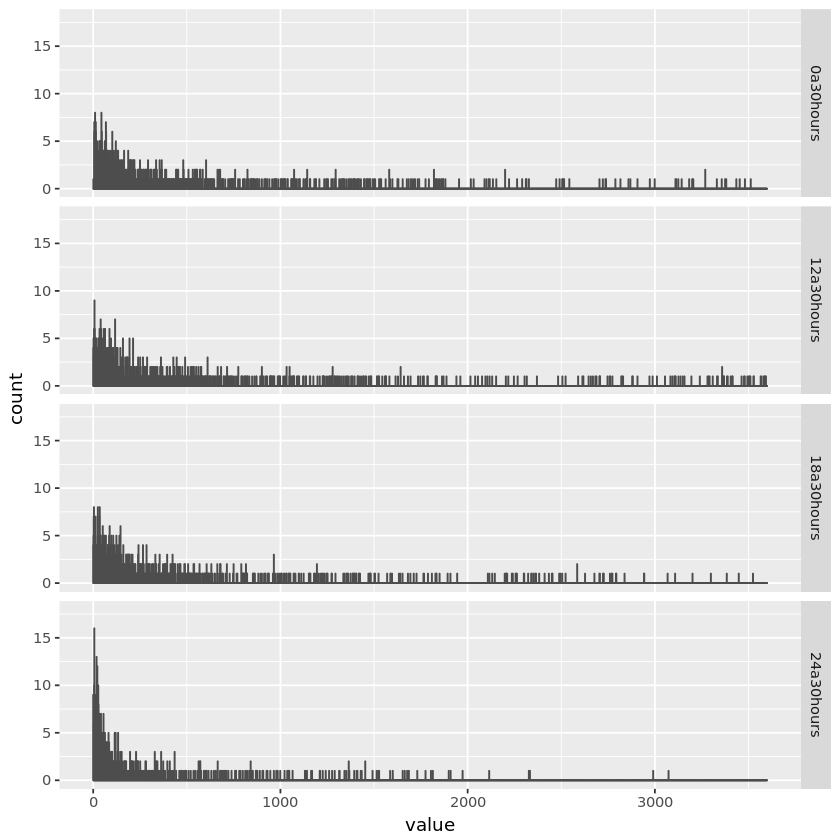

In [28]:
ggplot(resultsDeltas.long, aes(x=value, fill=hours)) + 
    geom_histogram(binwidth=1, color="grey30", fill="white") +
    facet_grid(case ~ .) + 
    xlim(0, 3600) + ## xlim(0, 300) 
    ylim(0, 18) ## ylim(0, .15)

Warning message in self$trans$transform(x):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 224 rows containing non-finite values (stat_density).”

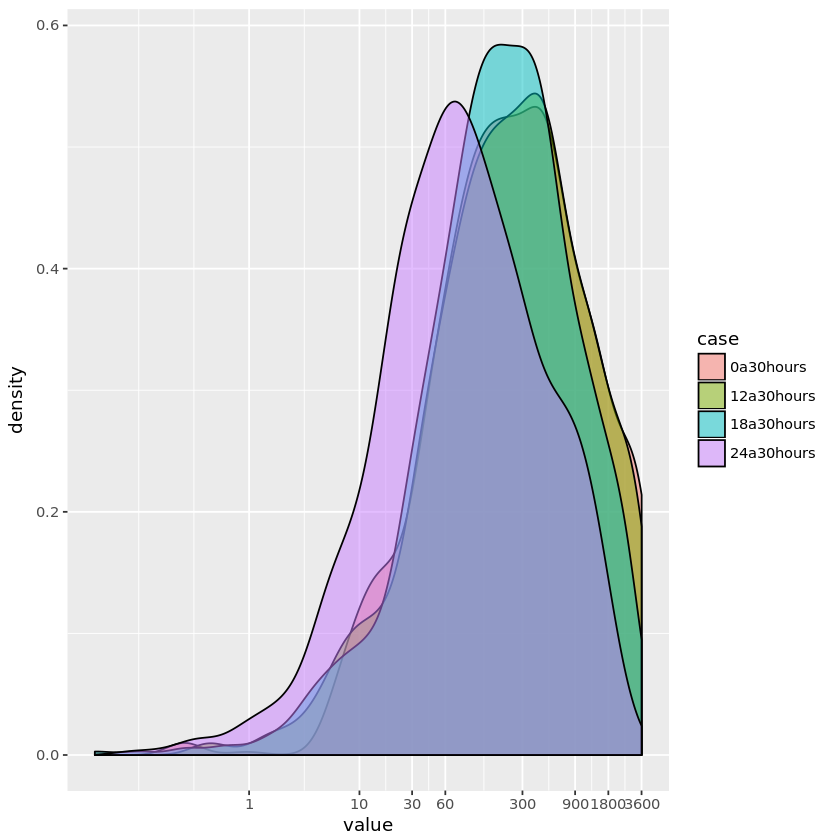

In [29]:
# transform x-axis to log 10
ggplot(resultsDeltas.long, aes(x=value, fill=case)) + 
    geom_density(alpha=0.5) + 
    scale_x_log10(breaks=c(1,10,30,60,300,900,1800,3600))

In [30]:
rSquared <- function(m) {print(paste("r2:",format(summary(m)$r.squared, digits=2), "/ Adj r2:",format(summary(m)$adj.r.square, digits=2)))}
adjustedResults <- subset(resultsDeltas, case=="18a30hours")
slrm1 <- lm(runtime ~ p_ws, data=adjustedResults)
slrm2 <- lm(runtime ~ p_hh, data=adjustedResults)
slrm3 <- lm(runtime ~ p_th, data=adjustedResults)
slrm4 <- lm(runtime ~ p_10h, data=adjustedResults)
mlrm1 <- lm(runtime ~ p_ws + p_hh, data=adjustedResults)
mlrm2 <- lm(runtime ~ p_ws + p_hh + p_10h, data=adjustedResults)
mlrm3 <- lm(runtime ~ p_ws + p_hh + p_10h + p_th, data=adjustedResults)
mlrm4 <- lm(runtime ~ p_1h + p_10h + p_100h + p_herb + p_1000h + p_ws + p_wd + p_th + p_hh + p_adj, data=adjustedResults)
rSquared(slrm1)
rSquared(slrm2)
rSquared(slrm3)
rSquared(slrm4)
rSquared(mlrm1)
rSquared(mlrm2)
rSquared(mlrm3)
rSquared(mlrm4)

[1] "r2: 0.26 / Adj r2: 0.26"
[1] "r2: 0.14 / Adj r2: 0.14"
[1] "r2: 0.00048 / Adj r2: -0.00052"
[1] "r2: 0.0066 / Adj r2: 0.0056"
[1] "r2: 0.41 / Adj r2: 0.4"
[1] "r2: 0.41 / Adj r2: 0.41"
[1] "r2: 0.41 / Adj r2: 0.41"
[1] "r2: 0.41 / Adj r2: 0.41"


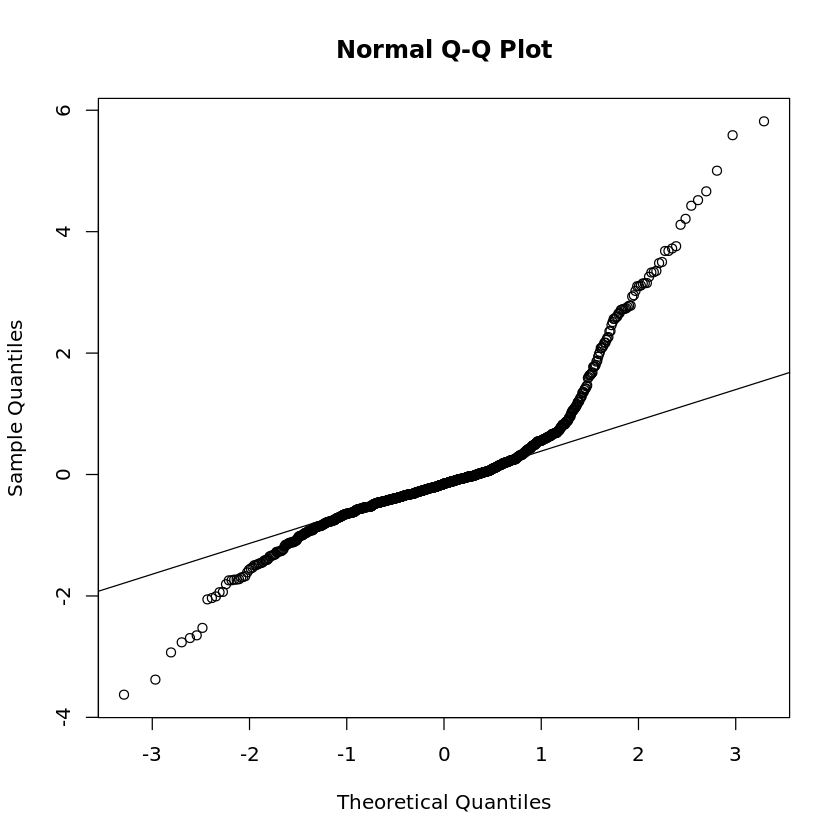

In [31]:
qqnorm(rstandard(mlrm4))
qqline(rstandard(mlrm4))

In [41]:
#y ~ polym(x1, x2, degree=2, raw=TRUE)
#mlrm4 <- lm(runtime ~ p_1h + p_10h + p_100h + p_herb + p_1000h + p_ws + p_wd + p_th + p_hh + p_adj, data=adjustedResults)
mprm1 <- lm(runtime ~ polym(p_ws, p_hh, degree=11, raw=TRUE), data=adjustedResults)
mprm2 <- lm(runtime ~ polym(p_ws, p_hh, p_10h, degree=11, raw=TRUE), data=adjustedResults)
mprm3 <- lm(runtime ~ polym(p_ws, p_hh, p_th, p_10h, degree=11, raw=TRUE), data=adjustedResults)
rSquared(mprm1)
rSquared(mprm2)
rSquared(mprm3)

[1] "r2: 0.59 / Adj r2: 0.55"
[1] "r2: 0.74 / Adj r2: 0.6"
[1] "r2: 1 / Adj r2: 0.93"


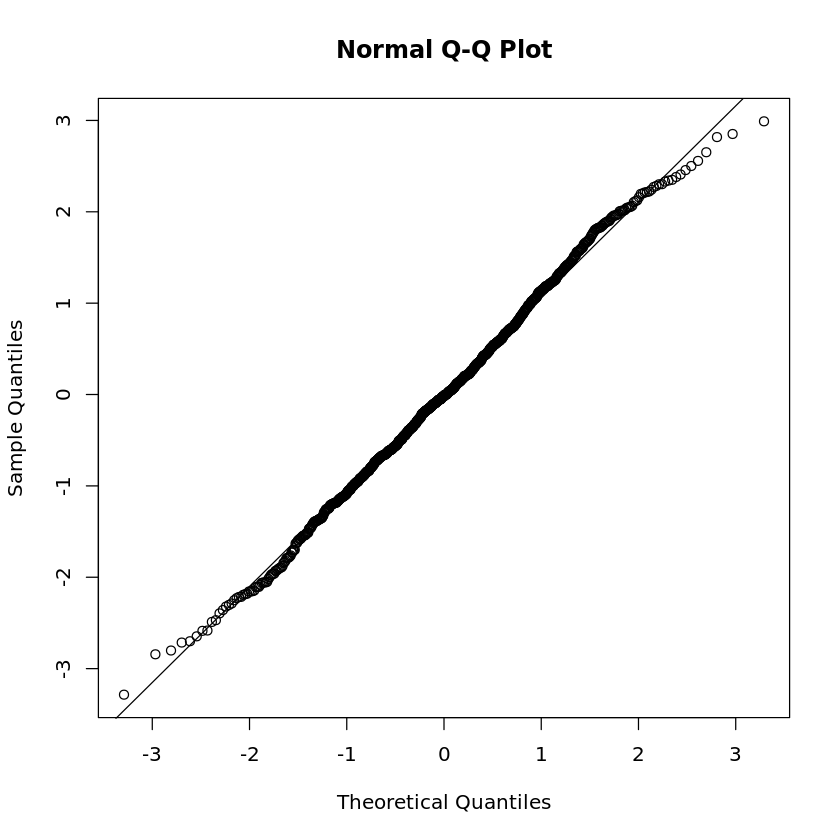

In [42]:
qqnorm(rstandard(mprm3))
qqline(rstandard(mprm3))

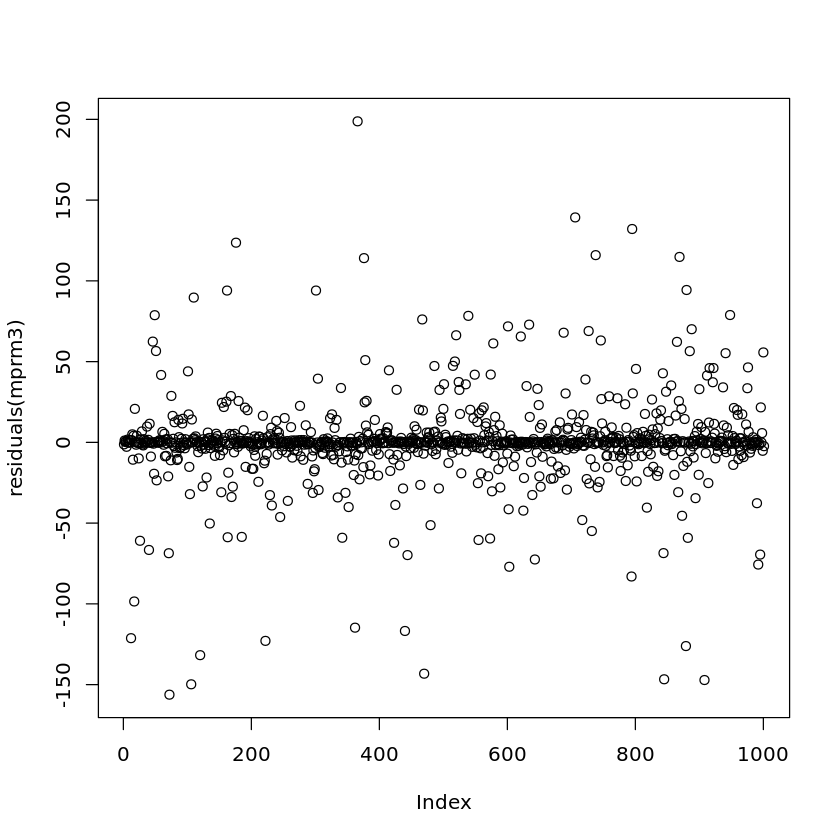

In [43]:
plot(residuals(mprm3))